In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA

DATA_PATH = 'ionosphere.data'

2023-05-19 11:45:26.236093: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 11:45:26.425254: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 11:45:26.426206: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 11:45:27.181264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv(DATA_PATH, header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].replace({'b': 0, 'g': 1}).values
print(X.shape, y.shape)
df

(351, 34) (351,)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

input_dim = X.shape[1]
hidden_dim = 20

input_layer = Input(shape=(input_dim,))
hidden_layer = Dense(hidden_dim, activation='relu')(input_layer)
output_layer = Dense(input_dim, activation='linear')(hidden_layer)

In [10]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 0s 11ms/step - loss: 1.0265 - val_loss: 1.0875
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.8884 - val_loss: 0.9805
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7873 - val_loss: 0.8994
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7125 - val_loss: 0.8353
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6527 - val_loss: 0.7798
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6051 - val_loss: 0.7275
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5638 - val_loss: 0.6806
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.5281 - val_loss: 0.6342
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4950 - val_loss: 0.5893
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4643 - val_loss: 0.5486
Epoch 11/100
9/9 [==========

In [11]:
# print('Num GPUs Available: ', len(tf.config.experimental.list_physical_devices('GPU')))

# tf.config.list_physical_devices('GPU')

In [12]:
encoder = Model(input_layer, hidden_layer)
encoded_X = encoder.predict(X)
new_df = pd.DataFrame(encoded_X, columns=['feature_{}'.format(i) for i in range(hidden_dim)])
new_df['label'] = y
new_df

11/11 [==============================] - 0s 589us/step


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,label
0,0.000000,0.000000,0.048930,0.683983,0.000000,0.000000,0.000000,0.000000,0.886930,0.00000,...,0.000000,0.548028,0.972416,0.000000,0.642396,0.786539,0.000000,1.180813,1.263683,1
1,0.000000,0.000000,0.000000,0.174223,0.000000,0.000000,0.000000,0.000000,0.863730,0.00000,...,0.870443,0.920390,0.000000,0.000000,0.000000,0.540353,0.000000,0.636849,0.155235,0
2,0.000000,0.083301,0.302716,1.121667,0.301737,0.000000,0.129970,0.219809,0.606431,0.00000,...,0.000000,0.232019,1.003139,0.000000,1.053177,0.490946,0.000000,1.010575,1.379331,1
3,0.000000,0.000000,0.914231,0.000000,0.279041,0.000000,0.121250,0.000000,0.000000,0.20641,...,1.087436,0.000000,0.445278,0.314545,0.000000,0.000000,0.955133,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.321534,0.008323,0.326185,0.353534,0.000000,1.288130,0.00000,...,0.000000,0.983750,0.786545,0.000000,0.700445,0.203281,0.000000,1.416041,0.928326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.000000,0.437636,0.868121,1.472755,0.000000,0.000000,0.000000,1.128778,0.000000,0.00000,...,0.000000,0.000000,0.582103,0.000000,1.155171,0.627195,0.000000,0.413586,1.239789,1
347,0.122162,0.384358,0.797419,1.571154,0.256765,0.000000,0.126961,1.230625,0.000000,0.00000,...,0.000000,0.000000,0.802351,0.000000,1.286983,0.588018,0.000000,0.471431,1.363273,1
348,0.126929,0.430152,0.769897,1.551474,0.223057,0.000000,0.102013,1.229243,0.000000,0.00000,...,0.000000,0.000000,0.821744,0.000000,1.317848,0.622128,0.000000,0.467559,1.342395,1
349,0.198930,0.452095,0.731229,1.423521,0.258464,0.000000,0.084256,1.101146,0.000000,0.00000,...,0.000000,0.000000,1.055093,0.000000,1.298973,0.658228,0.000000,0.448911,1.230024,1


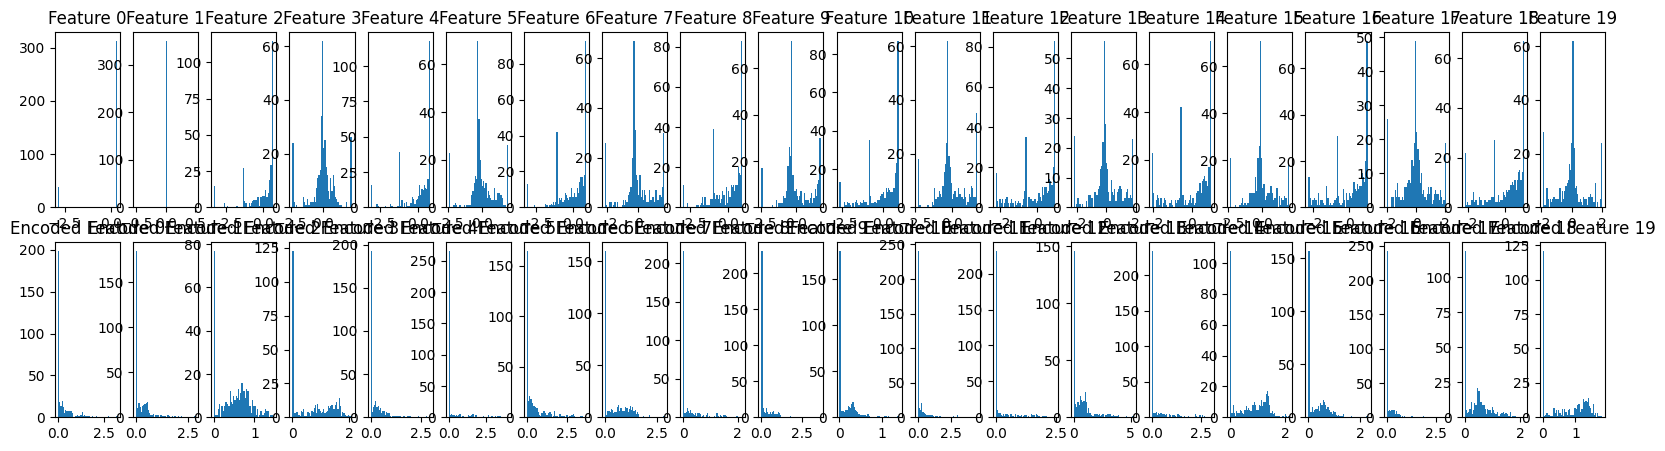

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=hidden_dim, figsize=(20, 5))

for i in range(hidden_dim):
    axs[0, i].hist(X[:, i], bins=50)
    axs[0, i].set_title("Feature {}".format(i))

    axs[1, i].hist(encoded_X[:, i], bins=50)
    axs[1, i].set_title("Encoded Feature {}".format(i))

plt.show()

In [16]:
pca = PCA(n_components=hidden_dim)
pca.fit(X)

print(f'Variance proportion explained by the {hidden_dim} PCs: {100 * sum(pca.explained_variance_ratio_):.2f}%')

Variance proportion explained by the 20 PCs: 92.21%
